#     Nettoyage du dataset de CV

## 📚 1. Importation des bibliothèques

In [43]:
# Manipulation de données
import pandas as pd
import numpy as np

# Traitement du texte
import re
import string

# NLP - Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Gestion des warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliothèques importées avec succès")

✅ Bibliothèques importées avec succès


## 📥 2. Téléchargement des ressources NLTK

In [44]:
# Télécharger les ressources nécessaires pour NLTK
# Ces ressources sont utilisées pour le traitement du langage naturel

print("📥 Téléchargement des ressources NLTK...")

# Stopwords : mots communs sans valeur sémantique (the, a, is, etc.)
nltk.download('stopwords', quiet=True)

# WordNet : base de données lexicale pour la lemmatisation
nltk.download('wordnet', quiet=True)

# Punkt : tokenizer pour découper le texte en mots
nltk.download('punkt', quiet=True)

# Punkt_tab : nouvelle version du tokenizer punkt
nltk.download('punkt_tab', quiet=True)

# OMW : Open Multilingual Wordnet
nltk.download('omw-1.4', quiet=True)

print("✅ Ressources NLTK téléchargées")

📥 Téléchargement des ressources NLTK...
✅ Ressources NLTK téléchargées


## 📂 3. Chargement des données brutes

In [45]:
# Chemin vers le fichier de données brutes
file_path = "../data/raw/resume_data.csv"

# Chargement du dataset dans un DataFrame pandas
print("📂 Chargement du dataset...")
dataset = pd.read_csv(file_path)

print(f"✅ Dataset chargé avec succès !")
print(f"📊 Nombre de CV : {len(dataset)}")
print(f"📋 Nombre de colonnes : {len(dataset.columns)}")

# Afficher les premières lignes
dataset.head()

📂 Chargement du dataset...
✅ Dataset chargé avec succès !
📊 Nombre de CV : 9544
📋 Nombre de colonnes : 35


,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


## 🔍 4. Exploration des données

In [27]:
# Informations sur le dataset
print("=" * 80)
print("INFORMATIONS SUR LE DATASET")
print("=" * 80)
dataset.info()

INFORMATIONS SUR LE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  st

In [46]:
# Statistiques descriptives
print("\n" + "=" * 80)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 80)
dataset.describe(include='all')


STATISTIQUES DESCRIPTIVES


,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
count,784,4740,9488,9460,9460,9460,9460,9460,9460,9460,...,2008,2008,2008,9544,9544,8180,5457,9544,7843,9544.000000
unique,28,171,340,328,180,149,78,30,210,199,...,7,30,11,28,20,17,14,28,23,NaN
top,"Sunnyvale, CA",Big data analytics working and database wareho...,[],"['Illinois Institute of Technology', 'National...",['B.Tech'],['2019'],['N/A'],['N/A'],['N/A'],"['Company Name', 'Company Name', 'Company Name']",...,[None],['N/A'],[None],Project Coordinator (Civil),Bachelor/Honors,At least 5 years,Age 25 to 40 years,Project Design\nData Analysis\nACCORD/Alliance...,AutoCAD\nCommunication and negotiation skills\...,NaN
freq,28,28,56,112,1764,1428,3612,3416,616,1204,...,1196,644,1028,342,2044,1024,1023,342,342,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660831
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167040
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683333
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.793333


In [47]:
# Vérification des valeurs manquantes
print("\n" + "=" * 80)
print("VALEURS MANQUANTES PAR COLONNE")
print("=" * 80)

missing_values = dataset.isnull().sum()
missing_percent = (missing_values / len(dataset)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs manquantes': missing_values.values,
    'Pourcentage': missing_percent.values
})

# Afficher uniquement les colonnes avec des valeurs manquantes
missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Valeurs manquantes', ascending=False)


VALEURS MANQUANTES PAR COLONNE


,Colonne,Valeurs manquantes,Pourcentage
22,proficiency_levels,8844,92.665549
21,languages,8844,92.665549
0,address,8760,91.785415
24,certification_skills,7536,78.960604
27,expiry_dates,7536,78.960604
26,issue_dates,7536,78.960604
25,online_links,7536,78.960604
23,certification_providers,7536,78.960604
18,extra_curricular_organization_names,6118,64.103101
17,extra_curricular_activity_types,6118,64.103101


## 🧼 5. Nettoyage initial des données

In [48]:
# Supprimer les lignes complètement vides
print("🧼 Suppression des lignes vides...")
initial_count = len(dataset)

dataset.dropna(how='all', inplace=True)

removed_count = initial_count - len(dataset)
print(f"✅ {removed_count} lignes vides supprimées")
print(f"📊 Lignes restantes : {len(dataset)}")

🧼 Suppression des lignes vides...
✅ 0 lignes vides supprimées
📊 Lignes restantes : 9544


## 📝 6. Fusion des colonnes textuelles

In [49]:
# Liste des colonnes contenant du texte pertinent pour le CV
# Ces colonnes seront fusionnées pour créer un texte unique par CV

text_columns = [
    "career_objective",          # Objectif de carrière
    "skills",                    # Compétences techniques
    "professional_company_names", # Entreprises
    "positions",                 # Postes occupés
    "responsibilities",          # Responsabilités
    "responsibilities.1",        # Responsabilités additionnelles
    "related_skils_in_job",     # Compétences liées au poste
    "languages",                 # Langues parlées
    "certification_skills",      # Certifications
    "skills_required"            # Compétences requises
]

# Vérifier quelles colonnes existent dans le dataset
text_columns = [col for col in text_columns if col in dataset.columns]

print(f"📝 Fusion de {len(text_columns)} colonnes textuelles...")
print(f"Colonnes utilisées : {text_columns}")

# Fusionner toutes les colonnes en un seul texte
# Convertir en string pour éviter les erreurs avec les valeurs NaN
dataset["resume_text"] = dataset[text_columns].astype(str).apply(
    lambda row: " ".join(row.values), axis=1
)

# Remplacer les valeurs NaN par des chaînes vides
dataset["resume_text"] = dataset["resume_text"].fillna("")

print("✅ Colonne 'resume_text' créée avec succès !")
print(f"📏 Longueur moyenne du texte : {dataset['resume_text'].str.len().mean():.0f} caractères")

# Afficher un exemple
dataset[["resume_text"]].head(2)

📝 Fusion de 10 colonnes textuelles...
Colonnes utilisées : ['career_objective', 'skills', 'professional_company_names', 'positions', 'responsibilities', 'responsibilities.1', 'related_skils_in_job', 'languages', 'certification_skills', 'skills_required']
✅ Colonne 'resume_text' créée avec succès !
📏 Longueur moyenne du texte : 1298 caractères


,resume_text
0,Big data analytics working and database wareho...
1,Fresher looking to join as a data analyst and ...


## 🛠️ 7. Fonctions de nettoyage de texte

In [50]:
def clean_text(text):
    """
    Nettoie le texte en effectuant les opérations suivantes :
    - Conversion en minuscules
    - Suppression des balises HTML
    - Suppression des URLs
    - Suppression des caractères spéciaux
    - Normalisation des espaces
    
    Args:
        text (str): Texte brut à nettoyer
    
    Returns:
        str: Texte nettoyé
    """
    # Vérifier si le texte est vide ou NaN
    if pd.isna(text) or text == "":
        return ""
    
    # Convertir en minuscules
    text = text.lower()
    
    # Supprimer les balises HTML (ex: <br>, <div>, etc.)
    text = re.sub(r'<.*?>', '', text)
    
    # Supprimer les URLs (http://, https://, www.)
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Supprimer les emails
    text = re.sub(r'\S+@\S+', '', text)
    
    # Garder uniquement les lettres, chiffres et espaces
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    
    # Supprimer les chiffres isolés
    text = re.sub(r'\b\d+\b', '', text)
    
    # Normaliser les espaces multiples en un seul
    text = re.sub(r'\s+', ' ', text)
    
    # Supprimer les espaces en début et fin
    text = text.strip()
    
    return text

print("✅ Fonction clean_text() définie")

✅ Fonction clean_text() définie


In [51]:
def remove_stopwords(text):
    """
    Supprime les mots vides (stopwords) du texte.
    Les stopwords sont des mots très fréquents qui n'apportent pas de valeur sémantique
    (ex: the, is, a, an, in, etc.)
    
    Args:
        text (str): Texte à traiter
    
    Returns:
        str: Texte sans stopwords
    """
    # Vérifier si le texte est vide
    if not text or text == "":
        return ""
    
    # Récupérer la liste des stopwords anglais
    stop_words = set(stopwords.words('english'))
    
    # Tokeniser le texte (découper en mots)
    tokens = word_tokenize(text)
    
    # Filtrer les stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Reconstituer le texte
    return " ".join(filtered_tokens)

print("✅ Fonction remove_stopwords() définie")

✅ Fonction remove_stopwords() définie


In [52]:
def lemmatize_text(text):
    """
    Lemmatisation du texte : ramène chaque mot à sa forme canonique (lemme).
    Exemples :
    - running, runs, ran -> run
    - better, best -> good
    - cats -> cat
    
    Args:
        text (str): Texte à lemmatiser
    
    Returns:
        str: Texte lemmatisé
    """
    # Vérifier si le texte est vide
    if not text or text == "":
        return ""
    
    # Initialiser le lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Tokeniser le texte
    tokens = word_tokenize(text)
    
    # Lemmatiser chaque token
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Reconstituer le texte
    return " ".join(lemmatized_tokens)

print("✅ Fonction lemmatize_text() définie")

✅ Fonction lemmatize_text() définie


In [53]:
def full_clean_pipeline(text):
    """
    Pipeline complet de nettoyage NLP.
    Applique toutes les étapes de nettoyage dans l'ordre :
    1. Nettoyage de base (minuscules, suppression HTML, URLs, etc.)
    2. Suppression des stopwords
    3. Lemmatisation
    
    Args:
        text (str): Texte brut
    
    Returns:
        str: Texte complètement nettoyé et prêt pour le ML
    """
    text = clean_text(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return text

print("✅ Fonction full_clean_pipeline() définie")

✅ Fonction full_clean_pipeline() définie


## 🔄 8. Application du pipeline de nettoyage

In [54]:
# Appliquer le pipeline de nettoyage sur tous les CV
print("🔄 Application du pipeline de nettoyage sur tous les CV...")
print("⏳ Cette opération peut prendre quelques minutes...")

# Appliquer la fonction sur chaque ligne
dataset["clean_text"] = dataset["resume_text"].apply(full_clean_pipeline)

print(f"✅ Nettoyage terminé !")
print(f"📊 {len(dataset)} CV traités avec succès")

# Afficher un exemple de comparaison avant/après
print("\n" + "=" * 80)
print("EXEMPLE DE NETTOYAGE")
print("=" * 80)
print("\n📄 TEXTE ORIGINAL (extrait):")
print(dataset["resume_text"].iloc[0][:300] + "...")
print("\n🧹 TEXTE NETTOYÉ (extrait):")
print(dataset["clean_text"].iloc[0][:300] + "...")

🔄 Application du pipeline de nettoyage sur tous les CV...
⏳ Cette opération peut prendre quelques minutes...
✅ Nettoyage terminé !
📊 9544 CV traités avec succès

EXEMPLE DE NETTOYAGE

📄 TEXTE ORIGINAL (extrait):
Big data analytics working and database warehouse manager with robust experience in handling all kinds of data. I have also used multiple cloud infrastructure services and am well acquainted with them. Currently in search of role that offers more of development. ['Big Data', 'Hadoop', 'Hive', 'Pytho...

🧹 TEXTE NETTOYÉ (extrait):
big data analytics working database warehouse manager robust experience handling kind data also used multiple cloud infrastructure service well acquainted currently search role offer development big data hadoop hive python mapreduce spark java machine learning cloud hdfs yarn core java data science ...


## 🏷️ 9. Extraction des labels - Domaine Professionnel

In [56]:
def extract_domain(row):
    """
    Extrait le domaine professionnel à partir des compétences et du poste.
    Utilise une approche basée sur des mots-clés pour classifier le domaine.
    
    Args:
        row: Ligne du DataFrame contenant les informations du CV
    
    Returns:
        str: Domaine professionnel identifié
    """
    # Concaténer les colonnes pertinentes
    text = str(row.get("skills", "")) + " " + \
           str(row.get("positions", "")) + " " + \
           str(row.get("﻿job_position_name", ""))
    
    text = text.lower()
    
    # ====== DOMAINES IT & TECHNOLOGIE ======
    
    # IT & Data Science
    data_keywords = ["data", "machine learning", "ai", "artificial intelligence",
                     "python", "java", "software", "developer", "engineer",
                     "big data", "analytics", "data science", "deep learning",
                     "tensorflow", "pytorch", "hadoop", "spark"]
    if any(word in text for word in data_keywords):
        return "IT & Data Science"
    
    # Web Development
    web_keywords = ["web", "frontend", "backend", "javascript", "react", 
                    "angular", "vue", "fullstack", "html", "css", "node",
                    "php", "django", "flask", "wordpress"]
    if any(word in text for word in web_keywords):
        return "Web Development"
    
    # DevOps & Cloud
    devops_keywords = ["devops", "cloud", "aws", "azure", "gcp", 
                       "kubernetes", "docker", "jenkins", "ci/cd",
                       "infrastructure", "deployment", "terraform"]
    if any(word in text for word in devops_keywords):
        return "DevOps & Cloud"
    
    # ====== BUSINESS & MANAGEMENT ======
    
    # Business & Management
    business_keywords = ["manager", "management", "business", "consultant",
                        "strategy", "operations", "director", "executive",
                        "project manager", "product manager"]
    if any(word in text for word in business_keywords):
        return "Business & Management"
    
    # Marketing & Communication
    marketing_keywords = ["marketing", "digital marketing", "seo", "sem",
                         "content", "social media", "communication",
                         "brand", "advertising", "campaign"]
    if any(word in text for word in marketing_keywords):
        return "Marketing & Communication"
    
    # Sales & Business Development
    sales_keywords = ["sales", "account", "commercial", "business development",
                     "key account", "revenue", "client relations"]
    if any(word in text for word in sales_keywords):
        return "Sales & Business Development"
    
    # ====== FINANCE & RH ======
    
    # Finance & Accounting
    finance_keywords = ["finance", "accounting", "audit", "comptable",
                       "financial", "controller", "accountant", "cpa",
                       "investment", "banking"]
    if any(word in text for word in finance_keywords):
        return "Finance & Accounting"
    
    # Human Resources
    hr_keywords = ["hr", "human resources", "recruitment", "recruiter",
                  "talent", "rh", "hiring", "onboarding", "hrm"]
    if any(word in text for word in hr_keywords):
        return "Human Resources"
    
    # ====== AUTRES DOMAINES ======
    
    # Design & Creative
    design_keywords = ["design", "graphic", "ui", "ux", "creative",
                      "photoshop", "illustrator", "figma", "sketch",
                      "designer", "visual"]
    if any(word in text for word in design_keywords):
        return "Design & Creative"
    
    # Support & Customer Service
    support_keywords = ["support", "helpdesk", "customer service",
                       "technical support", "customer care", "service desk"]
    if any(word in text for word in support_keywords):
        return "Support & Customer Service"
    
    # Par défaut
    return "Other"

# Appliquer la fonction d'extraction
print("🏢 Extraction du domaine professionnel...")
dataset["domain"] = dataset.apply(extract_domain, axis=1)

print("✅ Domaines extraits avec succès !")
print("\n📊 Distribution des domaines :")
print(dataset["domain"].value_counts())

🏢 Extraction du domaine professionnel...
✅ Domaines extraits avec succès !

📊 Distribution des domaines :
domain
IT & Data Science               9235
Business & Management            272
Marketing & Communication         11
Sales & Business Development       8
Human Resources                    4
Support & Customer Service         4
Other                              4
Design & Creative                  4
Web Development                    2
Name: count, dtype: int64


## 📈 10. Extraction des labels - Niveau d'Expérience

In [57]:
def extract_experience_level(row):
    """
    Détermine le niveau d'expérience professionnelle.
    Basé sur les exigences d'expérience et le titre du poste.
    
    Args:
        row: Ligne du DataFrame contenant les informations du CV
    
    Returns:
        str: Niveau d'expérience identifié
    """
    # Récupérer les informations pertinentes
    experience_req = str(row.get("experiencere_requirement", "")).lower()
    positions = str(row.get("positions", "")).lower()
    
    # ====== DÉTECTION PAR TITRE ======
    
    # Senior (10+ ans)
    senior_titles = ["senior", "lead", "principal", "chief", "head", 
                    "director", "vp", "vice president"]
    if any(title in positions for title in senior_titles):
        return "Senior (10+ ans)"
    
    # Junior (1-2 ans)
    junior_titles = ["junior", "entry", "associate", "trainee", "intern"]
    if any(title in positions for title in junior_titles):
        return "Junior (1-2 ans)"
    
    # ====== DÉTECTION PAR ANNÉES D'EXPÉRIENCE ======
    
    # Extraire les nombres de l'exigence d'expérience
    numbers = re.findall(r'\d+', experience_req)
    
    if numbers:
        # Prendre le premier nombre trouvé
        years = int(numbers[0])
        
        if years >= 10:
            return "Senior (10+ ans)"
        elif years >= 5:
            return "Confirmé (5-10 ans)"
        elif years >= 2:
            return "Intermédiaire (2-5 ans)"
        elif years >= 1:
            return "Junior (1-2 ans)"
        else:
            return "Débutant (0-1 an)"
    
    # Par défaut : Débutant
    return "Débutant (0-1 an)"

# Appliquer la fonction d'extraction
print("📊 Extraction du niveau d'expérience...")
dataset["experience_level"] = dataset.apply(extract_experience_level, axis=1)

print("✅ Niveaux d'expérience extraits avec succès !")
print("\n📊 Distribution des niveaux d'expérience :")
print(dataset["experience_level"].value_counts())

📊 Extraction du niveau d'expérience...
✅ Niveaux d'expérience extraits avec succès !

📊 Distribution des niveaux d'expérience :
experience_level
Junior (1-2 ans)           4237
Senior (10+ ans)           1955
Intermédiaire (2-5 ans)    1592
Confirmé (5-10 ans)        1121
Débutant (0-1 an)           639
Name: count, dtype: int64


## 🎯 11. Extraction des labels - Compétences Principales

In [59]:
def extract_main_skills(row):
    """
    Identifie et catégorise les compétences principales du CV.
    Un CV peut appartenir à plusieurs catégories de compétences.
    
    Args:
        row: Ligne du DataFrame contenant les informations du CV
    
    Returns:
        str: Catégories de compétences séparées par des virgules
    """
    # Concaténer toutes les colonnes de compétences
    skills_text = str(row.get("skills", "")) + " " + \
                  str(row.get("skills_required", "")) + " " + \
                  str(row.get("related_skils_in_job", ""))
    
    skills_text = skills_text.lower()
    
    # Liste pour stocker les catégories identifiées
    skills_categories = []
    
    # ====== COMPÉTENCES TECHNIQUES ======
    
    # Programming
    programming_skills = ["python", "java", "javascript", "c++", "c#", "ruby",
                         "php", "swift", "kotlin", "go", "rust", "scala",
                         "sql", "html", "css", "typescript"]
    if any(skill in skills_text for skill in programming_skills):
        skills_categories.append("Programming")
    
    # Data & Analytics
    data_skills = ["data", "analytics", "machine learning", "ai", "ml",
                  "big data", "hadoop", "spark", "tableau", "power bi",
                  "data science", "statistics", "r programming", "pandas",
                  "numpy", "scikit-learn", "tensorflow", "pytorch"]
    if any(skill in skills_text for skill in data_skills):
        skills_categories.append("Data & Analytics")
    
    # Cloud & DevOps
    cloud_skills = ["aws", "azure", "gcp", "google cloud", "cloud",
                   "docker", "kubernetes", "jenkins", "devops", "ci/cd",
                   "terraform", "ansible", "linux", "unix"]
    if any(skill in skills_text for skill in cloud_skills):
        skills_categories.append("Cloud & DevOps")
    
    # Web Development
    web_skills = ["react", "angular", "vue", "node", "express", "django",
                 "flask", "spring", "asp.net", "laravel", "wordpress",
                 "frontend", "backend", "fullstack"]
    if any(skill in skills_text for skill in web_skills):
        skills_categories.append("Web Development")
    
    # ====== COMPÉTENCES BUSINESS ======
    
    # Management & Soft Skills
    management_skills = ["management", "leadership", "communication", "team",
                        "project management", "agile", "scrum", "kanban",
                        "collaboration", "problem solving", "critical thinking"]
    if any(skill in skills_text for skill in management_skills):
        skills_categories.append("Management & Soft Skills")
    
    # Marketing & Digital
    marketing_skills = ["marketing", "seo", "sem", "google analytics",
                       "social media", "content marketing", "email marketing",
                       "digital marketing", "ads", "campaign"]
    if any(skill in skills_text for skill in marketing_skills):
        skills_categories.append("Marketing & Digital")
    
    # ====== COMPÉTENCES CRÉATIVES ======
    
    # Design & Creative
    design_skills = ["design", "photoshop", "illustrator", "figma", "sketch",
                    "ui", "ux", "adobe", "indesign", "xd", "creative",
                    "graphic design", "visual design"]
    if any(skill in skills_text for skill in design_skills):
        skills_categories.append("Design & Creative")
    
    # ====== AUTRES ======
    
    # Finance & Accounting
    finance_skills = ["accounting", "finance", "excel", "financial analysis",
                     "budgeting", "forecasting", "sap", "quickbooks"]
    if any(skill in skills_text for skill in finance_skills):
        skills_categories.append("Finance & Accounting")
    
    # Retourner les catégories ou "General" si aucune n'est trouvée
    return ", ".join(skills_categories) if skills_categories else "General"

# Appliquer la fonction d'extraction
print("🎯 Extraction des compétences principales...")
dataset["main_skills"] = dataset.apply(extract_main_skills, axis=1)

print("✅ Compétences extraites avec succès !")
print("\n📊 Distribution des compétences (top 10) :")
print(dataset["main_skills"].value_counts().head(10))

🎯 Extraction des compétences principales...
✅ Compétences extraites avec succès !

📊 Distribution des compétences (top 10) :
main_skills
Programming, Data & Analytics                                                                                            765
Programming, Data & Analytics, Management & Soft Skills, Design & Creative                                               610
Programming, Data & Analytics, Management & Soft Skills                                                                  512
Programming, Data & Analytics, Management & Soft Skills, Design & Creative, Finance & Accounting                         450
Programming, Data & Analytics, Management & Soft Skills, Marketing & Digital, Design & Creative, Finance & Accounting    335
Data & Analytics, Management & Soft Skills, Design & Creative, Finance & Accounting                                      307
Programming, Data & Analytics, Web Development, Management & Soft Skills, Design & Creative                      

## 📊 12. Visualisation des données nettoyées

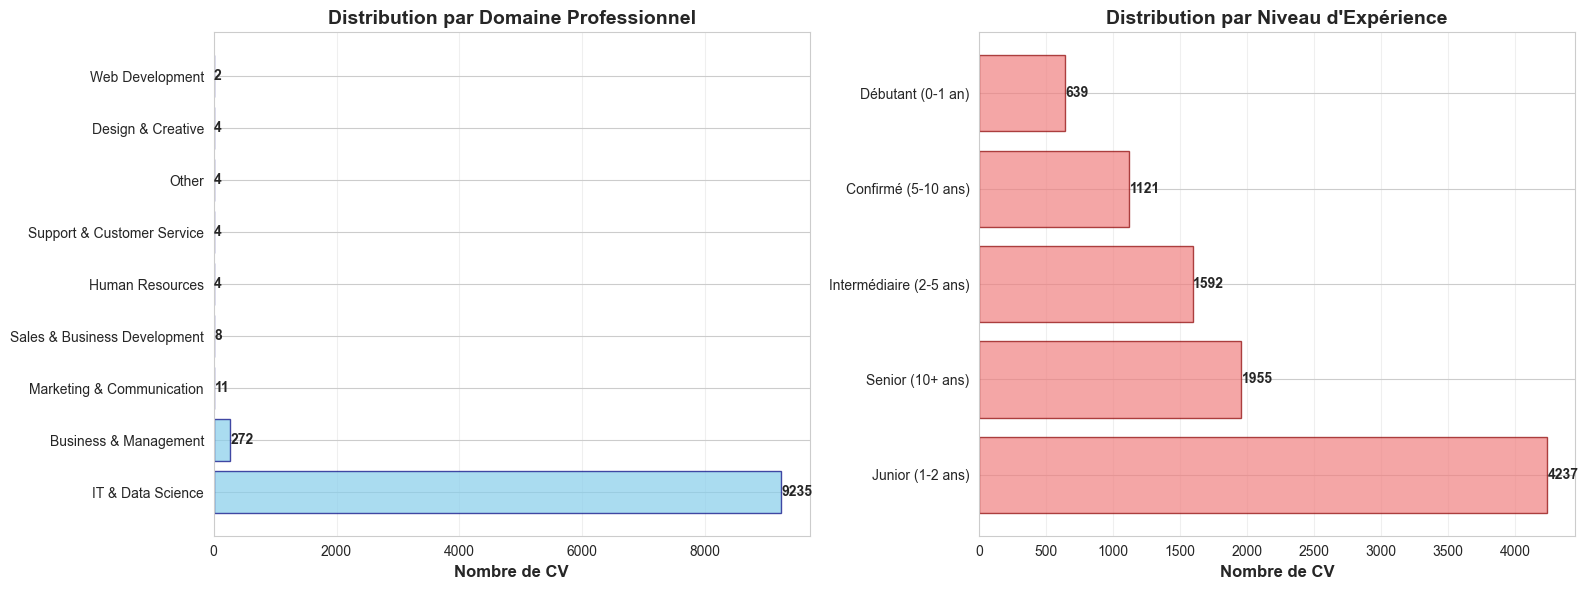


📊 STATISTIQUES DU DATASET NETTOYÉ
📄 Total de CV traités : 9544
🏢 Domaines uniques : 9
📈 Niveaux d'expérience : 5
🎯 Catégories de compétences : 142
📏 Longueur moyenne du texte nettoyé : 1115 caractères


In [60]:
# Configuration du style des graphiques
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 10

# Créer une figure avec 2 sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ====== GRAPHIQUE 1 : DISTRIBUTION DES DOMAINES ======
domain_counts = dataset["domain"].value_counts()
axes[0].barh(domain_counts.index, domain_counts.values, color='skyblue', edgecolor='navy', alpha=0.7)
axes[0].set_xlabel('Nombre de CV', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution par Domaine Professionnel', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(domain_counts.values):
    axes[0].text(v + 5, i, str(v), va='center', fontweight='bold')

# ====== GRAPHIQUE 2 : DISTRIBUTION DES NIVEAUX D'EXPÉRIENCE ======
exp_counts = dataset["experience_level"].value_counts()
axes[1].barh(exp_counts.index, exp_counts.values, color='lightcoral', edgecolor='darkred', alpha=0.7)
axes[1].set_xlabel('Nombre de CV', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution par Niveau d\'Expérience', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(exp_counts.values):
    axes[1].text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ====== STATISTIQUES RÉSUMÉES ======
print("\n" + "=" * 80)
print("📊 STATISTIQUES DU DATASET NETTOYÉ")
print("=" * 80)
print(f"📄 Total de CV traités : {len(dataset)}")
print(f"🏢 Domaines uniques : {dataset['domain'].nunique()}")
print(f"📈 Niveaux d'expérience : {dataset['experience_level'].nunique()}")
print(f"🎯 Catégories de compétences : {dataset['main_skills'].nunique()}")
print(f"📏 Longueur moyenne du texte nettoyé : {dataset['clean_text'].str.len().mean():.0f} caractères")

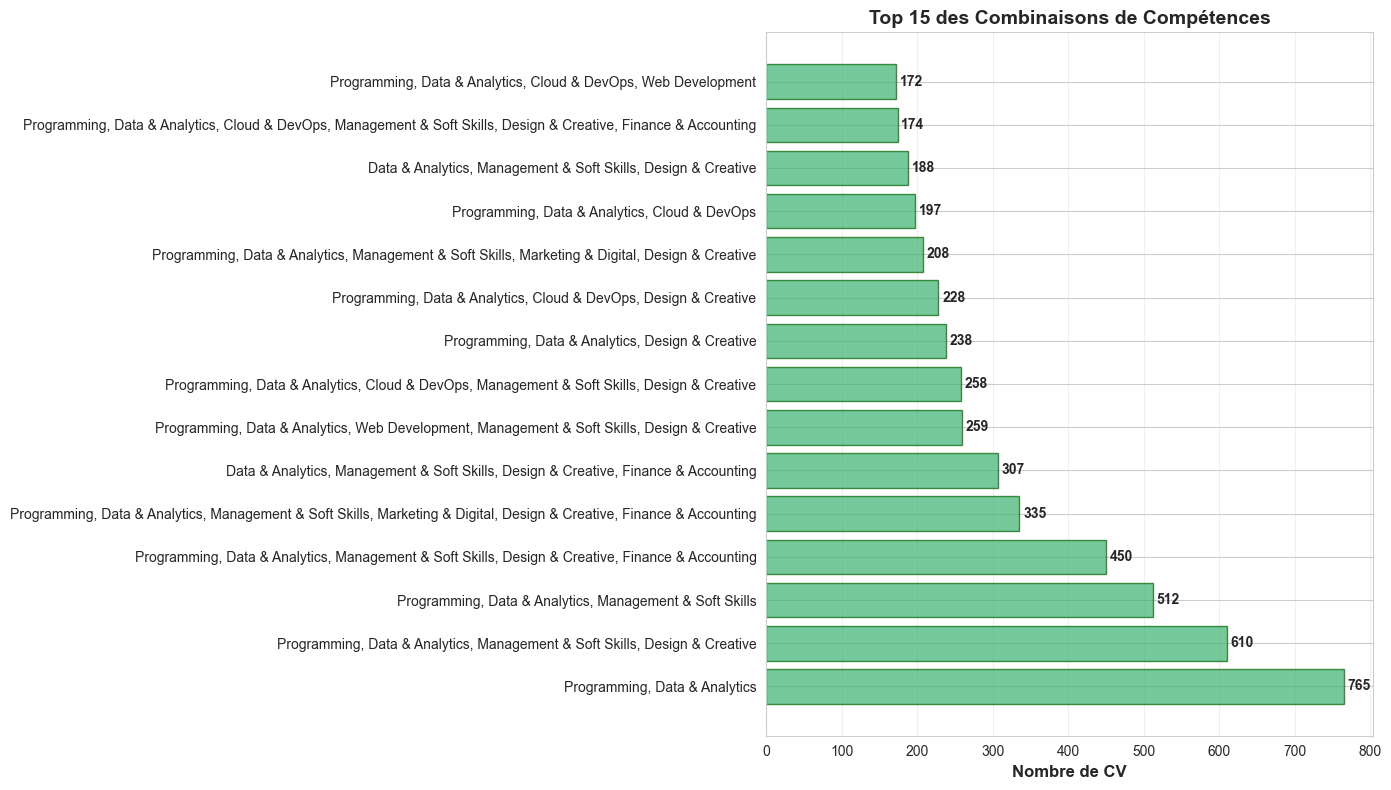

In [61]:
# Graphique supplémentaire : Top 15 des combinaisons de compétences
plt.figure(figsize=(14, 8))

skills_counts = dataset["main_skills"].value_counts().head(15)
plt.barh(range(len(skills_counts)), skills_counts.values, color='mediumseagreen', edgecolor='darkgreen', alpha=0.7)
plt.yticks(range(len(skills_counts)), skills_counts.index)
plt.xlabel('Nombre de CV', fontsize=12, fontweight='bold')
plt.title('Top 15 des Combinaisons de Compétences', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Ajouter les valeurs
for i, v in enumerate(skills_counts.values):
    plt.text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 🎯 13. Préparation du dataset final

In [62]:
# Sélectionner uniquement les colonnes nécessaires pour le modèle de ML
columns_to_keep = [
    "clean_text",        # Texte nettoyé (features pour le modèle)
    "domain",            # Label 1 : Domaine professionnel
    "experience_level",  # Label 2 : Niveau d'expérience
    "main_skills",       # Label 3 : Compétences principales
    "resume_text"        # Texte original (pour référence)
]

print("🎯 Sélection des colonnes pertinentes...")
clean_dataset = dataset[columns_to_keep].copy()

# ====== NETTOYAGE FINAL ======

print("🧹 Nettoyage final du dataset...")

# Supprimer les lignes avec du texte vide après nettoyage
clean_dataset = clean_dataset[clean_dataset["clean_text"].str.strip() != ""]

# Supprimer les lignes avec des valeurs manquantes dans clean_text
clean_dataset = clean_dataset.dropna(subset=["clean_text"])

# Supprimer les lignes avec un texte trop court (moins de 20 caractères)
clean_dataset = clean_dataset[clean_dataset["clean_text"].str.len() >= 20]

# Réinitialiser l'index
clean_dataset.reset_index(drop=True, inplace=True)

print(f"✅ Dataset final préparé avec succès !")
print(f"📊 Nombre final de CV : {len(clean_dataset)}")
print(f"📉 CV supprimés (texte vide ou trop court) : {len(dataset) - len(clean_dataset)}")

# Afficher un aperçu
print("\n" + "=" * 80)
print("APERÇU DU DATASET NETTOYÉ")
print("=" * 80)
clean_dataset.head()

🎯 Sélection des colonnes pertinentes...
🧹 Nettoyage final du dataset...
✅ Dataset final préparé avec succès !
📊 Nombre final de CV : 9544
📉 CV supprimés (texte vide ou trop court) : 0

APERÇU DU DATASET NETTOYÉ


,clean_text,domain,experience_level,main_skills,resume_text
0,big data analytics working database warehouse ...,IT & Data Science,Junior (1-2 ans),"Programming, Data & Analytics, Cloud & DevOps",Big data analytics working and database wareho...
1,fresher looking join data analyst junior data ...,IT & Data Science,Confirmé (5-10 ans),Data & Analytics,Fresher looking to join as a data analyst and ...
2,nan software development machine learning deep...,IT & Data Science,Intermédiaire (2-5 ans),"Programming, Data & Analytics, Cloud & DevOps,...","nan ['Software Development', 'Machine Learning..."
3,obtain position fast paced business office env...,IT & Data Science,Junior (1-2 ans),"Data & Analytics, Management & Soft Skills, De...",To obtain a position in a fast-paced business ...
4,professional accountant outstanding work ethic...,IT & Data Science,Senior (10+ ans),"Programming, Data & Analytics, Management & So...",Professional accountant with an outstanding wo...


## 👀 14. Vérification - Exemples de CV nettoyés

In [63]:
# Afficher quelques exemples de CV nettoyés pour vérification
print("=" * 80)
print("📄 EXEMPLES DE CV NETTOYÉS")
print("=" * 80)

# Afficher 3 exemples variés
for i in range(min(3, len(clean_dataset))):
    print(f"\n{'='*80}")
    print(f"CV #{i+1}")
    print(f"{'='*80}")
    print(f"🏢 Domaine           : {clean_dataset.iloc[i]['domain']}")
    print(f"📊 Expérience        : {clean_dataset.iloc[i]['experience_level']}")
    print(f"🎯 Compétences       : {clean_dataset.iloc[i]['main_skills']}")
    print(f"\n📝 TEXTE ORIGINAL (150 premiers caractères) :")
    print(f"   {clean_dataset.iloc[i]['resume_text'][:150]}...")
    print(f"\n🧹 TEXTE NETTOYÉ (150 premiers caractères) :")
    print(f"   {clean_dataset.iloc[i]['clean_text'][:150]}...")
    print(f"\n📏 Longueur du texte nettoyé : {len(clean_dataset.iloc[i]['clean_text'])} caractères")

📄 EXEMPLES DE CV NETTOYÉS

CV #1
🏢 Domaine           : IT & Data Science
📊 Expérience        : Junior (1-2 ans)
🎯 Compétences       : Programming, Data & Analytics, Cloud & DevOps

📝 TEXTE ORIGINAL (150 premiers caractères) :
   Big data analytics working and database warehouse manager with robust experience in handling all kinds of data. I have also used multiple cloud infras...

🧹 TEXTE NETTOYÉ (150 premiers caractères) :
   big data analytics working database warehouse manager robust experience handling kind data also used multiple cloud infrastructure service well acquai...

📏 Longueur du texte nettoyé : 720 caractères

CV #2
🏢 Domaine           : IT & Data Science
📊 Expérience        : Confirmé (5-10 ans)
🎯 Compétences       : Data & Analytics

📝 TEXTE ORIGINAL (150 premiers caractères) :
   Fresher looking to join as a data analyst and junior data scientist. Experienced in creating meaningful data dashboards and evaluation models. ['Data ...

🧹 TEXTE NETTOYÉ (150 premiers caractè

## 💾 15. Sauvegarde du dataset nettoyé

In [64]:
# Chemin de sauvegarde
output_path = "../data/processed/clean_cv_dataset.csv"

print("💾 Sauvegarde du dataset nettoyé...")

# Sauvegarder en CSV avec encodage UTF-8
clean_dataset.to_csv(output_path, index=False, encoding='utf-8')

print(f"✅ Dataset nettoyé sauvegardé avec succès !")
print(f"📁 Emplacement : {output_path}")
print(f"📊 Nombre de CV : {len(clean_dataset)}")
print(f"💽 Taille du fichier : {clean_dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

💾 Sauvegarde du dataset nettoyé...
✅ Dataset nettoyé sauvegardé avec succès !
📁 Emplacement : ../data/processed/clean_cv_dataset.csv
📊 Nombre de CV : 9544
💽 Taille du fichier : 25.83 MB


## ✅ 16. Résumé final

In [65]:
# Afficher un résumé complet de l'opération de nettoyage
print("\n" + "=" * 80)
print("✅ NETTOYAGE DES DONNÉES TERMINÉ AVEC SUCCÈS !")
print("=" * 80)

print("\n📊 RÉSUMÉ DES OPÉRATIONS :")
print(f"   ✓ Données brutes chargées : {len(dataset)} CV")
print(f"   ✓ Colonnes fusionnées : {len(text_columns)}")
print(f"   ✓ Pipeline NLP appliqué : Nettoyage + Stopwords + Lemmatisation")
print(f"   ✓ Labels extraits : Domaine, Expérience, Compétences")
print(f"   ✓ CV valides après nettoyage : {len(clean_dataset)}")

print("\n📈 DISTRIBUTION DES LABELS :")
print(f"   - Domaines professionnels : {dataset['domain'].nunique()} catégories")
print(f"   - Niveaux d'expérience : {dataset['experience_level'].nunique()} niveaux")
print(f"   - Compétences : {dataset['main_skills'].nunique()} combinaisons")

print("\n💾 FICHIER SAUVEGARDÉ :")
print(f"   - Chemin : {output_path}")
print(f"   - Format : CSV (UTF-8)")
print(f"   - Colonnes : {', '.join(clean_dataset.columns)}")

print("\n🎯 PROCHAINES ÉTAPES :")
print("   1. Prétraitement avancé (TF-IDF, Word Embeddings)")
print("   2. Feature Engineering")
print("   3. Entraînement des modèles de classification")
print("   4. Évaluation et optimisation des modèles")

print("\n" + "=" * 80)
print("🚀 Vous pouvez maintenant passer à l'étape suivante !")
print("=" * 80)


✅ NETTOYAGE DES DONNÉES TERMINÉ AVEC SUCCÈS !

📊 RÉSUMÉ DES OPÉRATIONS :
   ✓ Données brutes chargées : 9544 CV
   ✓ Colonnes fusionnées : 10
   ✓ Pipeline NLP appliqué : Nettoyage + Stopwords + Lemmatisation
   ✓ Labels extraits : Domaine, Expérience, Compétences
   ✓ CV valides après nettoyage : 9544

📈 DISTRIBUTION DES LABELS :
   - Domaines professionnels : 9 catégories
   - Niveaux d'expérience : 5 niveaux
   - Compétences : 142 combinaisons

💾 FICHIER SAUVEGARDÉ :
   - Chemin : ../data/processed/clean_cv_dataset.csv
   - Format : CSV (UTF-8)
   - Colonnes : clean_text, domain, experience_level, main_skills, resume_text

🎯 PROCHAINES ÉTAPES :
   1. Prétraitement avancé (TF-IDF, Word Embeddings)
   2. Feature Engineering
   3. Entraînement des modèles de classification
   4. Évaluation et optimisation des modèles

🚀 Vous pouvez maintenant passer à l'étape suivante !


In [66]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Téléchargement des ressources NLTK

In [67]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Charger le dataset brut

In [68]:
file_path = "../data/raw/resume_data.csv"
dataset = pd.read_csv(file_path)

print("=================Dataset chargé avec succès=======================")
dataset.head()

=================Dataset chargé avec succès=======================


,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [23]:
dataset.info()
dataset.describe(include="all")
dataset.head()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  start_dates                   

address                                8760
career_objective                       4804
skills                                   56
educational_institution_name             84
degree_names                             84
passing_years                            84
educational_results                      84
result_types                             84
major_field_of_studies                   84
professional_company_names               84
company_urls                             84
start_dates                              84
end_dates                                84
related_skils_in_job                     84
positions                                84
locations                                84
responsibilities                          0
extra_curricular_activity_types        6118
extra_curricular_organization_names    6118
extra_curricular_organization_links    6118
role_positions                         6118
languages                              8844
proficiency_levels              

In [25]:
dataset.dropna(how="all", inplace=True)

In [27]:
# Colonnes textuelles utiles à fusionner
text_columns = [
    "career_objective",
    "skills",
    "professional_company_names",
    "positions",
    "responsibilities",
    "responsibilities.1",
    "related_skils_in_job",
    "languages",
    "certification_skills",
    "skills_required"
]

# Vérifier quelles colonnes existent vraiment (par sécurité)
text_columns = [col for col in text_columns if col in dataset.columns]

# Fusionner les colonnes en un seul texte
dataset["resume_text"] = dataset[text_columns].astype(str).apply(lambda row: " ".join(row.values), axis=1)

print("✔️ Colonne 'resume_text' créée avec succès !")
dataset["resume_text"].head()


✔️ Colonne 'resume_text' créée avec succès !


0    Big data analytics working and database wareho...
1    Fresher looking to join as a data analyst and ...
2    nan ['Software Development', 'Machine Learning...
3    To obtain a position in a fast-paced business ...
4    Professional accountant with an outstanding wo...
Name: resume_text, dtype: object

In [34]:
dataset["resume_text"] = dataset["resume_text"].fillna("")

In [69]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)            # Supprimer HTML
    text = re.sub(r"http\S+|www\S+", "", text)   # Supprimer URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)  # Garder lettres/chiffres
    text = re.sub(r"\s+", " ", text).strip()      # Nettoyer espaces
    return text


In [70]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

In [72]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized)

In [73]:
def full_clean_pipeline(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return text

print("🔄 Application du pipeline de nettoyage...")
dataset["clean_text"] = dataset["resume_text"].apply(full_clean_pipeline)
print(f"✔️ Nettoyage terminé ! {len(dataset)} CV traités.")
dataset[["resume_text", "clean_text"]].head()

🔄 Application du pipeline de nettoyage...


KeyError: 'resume_text'

# Appliquer le pipeline complet de nettoyage

In [75]:
# Fonction pour extraire le domaine professionnel basé sur les compétences et positions
def extract_domain(row):
    """
    Extrait le domaine professionnel basé sur les compétences et le poste
    """
    text = str(row.get("skills", "")) + " " + str(row.get("positions", "")) + " " + str(row.get("﻿job_position_name", ""))
    text = text.lower()
    
    # Domaines IT & Tech
    if any(word in text for word in ["data", "machine learning", "ai", "python", "java", "software", "developer", "engineer", "big data", "analytics"]):
        return "IT & Data Science"
    elif any(word in text for word in ["web", "frontend", "backend", "javascript", "react", "angular", "fullstack"]):
        return "Web Development"
    elif any(word in text for word in ["devops", "cloud", "aws", "azure", "kubernetes", "docker"]):
        return "DevOps & Cloud"
    
    # Business & Management
    elif any(word in text for word in ["manager", "management", "business", "consultant", "strategy", "operations"]):
        return "Business & Management"
    elif any(word in text for word in ["marketing", "digital", "seo", "content", "social media"]):
        return "Marketing & Communication"
    elif any(word in text for word in ["sales", "account", "commercial", "business development"]):
        return "Sales & Business Development"
    
    # Finance & RH
    elif any(word in text for word in ["finance", "accounting", "audit", "comptable", "financial"]):
        return "Finance & Accounting"
    elif any(word in text for word in ["hr", "human resources", "recruitment", "talent", "rh"]):
        return "Human Resources"
    
    # Autres domaines
    elif any(word in text for word in ["design", "graphic", "ui", "ux", "creative"]):
        return "Design & Creative"
    elif any(word in text for word in ["support", "helpdesk", "customer service", "technical support"]):
        return "Support & Customer Service"
    else:
        return "Other"

print("🏢 Extraction du domaine professionnel...")
dataset["domain"] = dataset.apply(extract_domain, axis=1)
print("✔️ Domaines extraits !")
dataset["domain"].value_counts()

🏢 Extraction du domaine professionnel...
✔️ Domaines extraits !


domain
IT & Data Science               9223
Business & Management            240
Marketing & Communication         25
Other                             16
Sales & Business Development      14
Support & Customer Service         8
Human Resources                    6
Design & Creative                  6
Finance & Accounting               6
Name: count, dtype: int64

In [76]:
# Fonction pour extraire les compétences principales
def extract_main_skills(row):
    """
    Extrait et catégorise les compétences principales
    """
    skills_text = str(row.get("skills", "")) + " " + str(row.get("skills_required", "")) + " " + str(row.get("related_skils_in_job", ""))
    skills_text = skills_text.lower()
    
    skills_categories = []
    
    # Compétences techniques
    tech_skills = ["python", "java", "javascript", "c++", "sql", "html", "css", "react", "angular", "node"]
    if any(skill in skills_text for skill in tech_skills):
        skills_categories.append("Programming")
    
    # Data & Analytics
    data_skills = ["data", "analytics", "machine learning", "ai", "big data", "hadoop", "spark", "tableau", "power bi"]
    if any(skill in skills_text for skill in data_skills):
        skills_categories.append("Data & Analytics")
    
    # Cloud & DevOps
    cloud_skills = ["aws", "azure", "gcp", "cloud", "docker", "kubernetes", "devops", "ci/cd"]
    if any(skill in skills_text for skill in cloud_skills):
        skills_categories.append("Cloud & DevOps")
    
    # Management & Soft Skills
    soft_skills = ["management", "leadership", "communication", "team", "project management", "agile", "scrum"]
    if any(skill in skills_text for skill in soft_skills):
        skills_categories.append("Management & Soft Skills")
    
    # Design & Creative
    design_skills = ["design", "photoshop", "illustrator", "figma", "ui", "ux", "adobe"]
    if any(skill in skills_text for skill in design_skills):
        skills_categories.append("Design & Creative")
    
    return ", ".join(skills_categories) if skills_categories else "General"

print("🎯 Extraction des compétences principales...")
dataset["main_skills"] = dataset.apply(extract_main_skills, axis=1)
print("✔️ Compétences extraites !")
dataset["main_skills"].value_counts()

🎯 Extraction des compétences principales...
✔️ Compétences extraites !


main_skills
Data & Analytics, Management & Soft Skills, Design & Creative                                 1611
Programming, Data & Analytics, Management & Soft Skills, Design & Creative                    1559
Programming, Data & Analytics                                                                 1040
Programming, Data & Analytics, Management & Soft Skills                                        651
Data & Analytics, Management & Soft Skills                                                     510
Programming, Data & Analytics, Cloud & DevOps                                                  509
Programming, Data & Analytics, Design & Creative                                               456
Programming, Data & Analytics, Cloud & DevOps, Management & Soft Skills, Design & Creative     409
Management & Soft Skills, Design & Creative                                                    376
Data & Analytics                                                                               34

KeyError: 'experience_level'

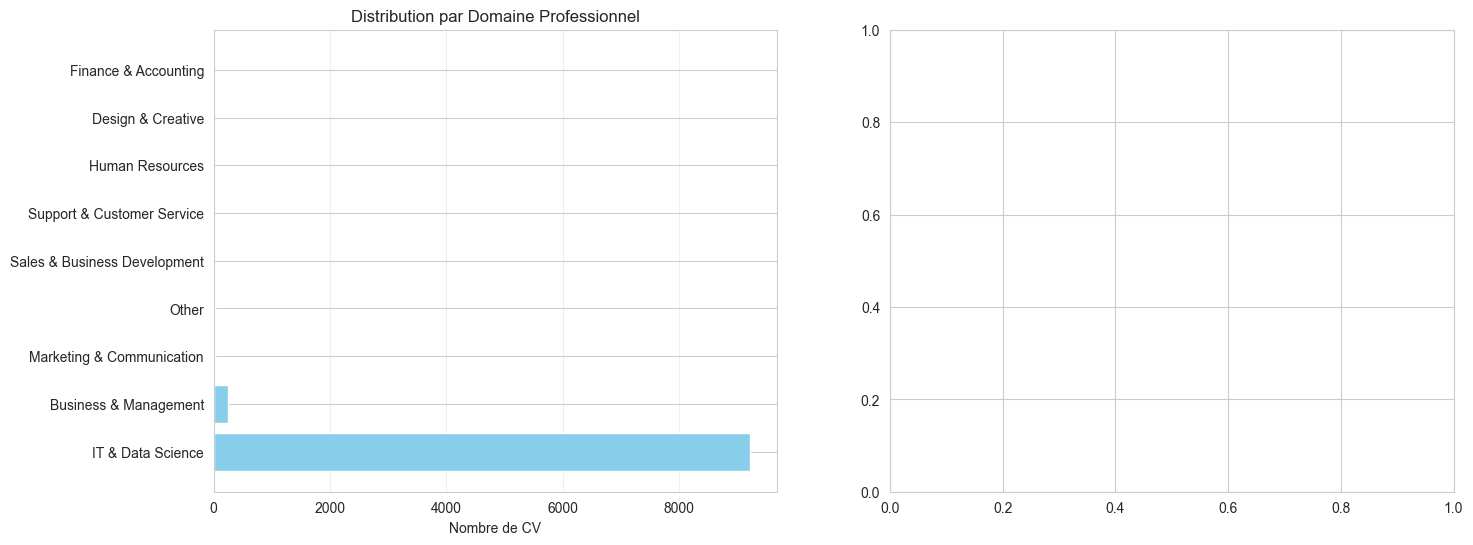

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Visualisation 1: Distribution des domaines
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Domaines professionnels
domain_counts = dataset["domain"].value_counts()
axes[0].barh(domain_counts.index, domain_counts.values, color='skyblue')
axes[0].set_xlabel('Nombre de CV')
axes[0].set_title('Distribution par Domaine Professionnel')
axes[0].grid(axis='x', alpha=0.3)

# Niveaux d'expérience
exp_counts = dataset["experience_level"].value_counts()
axes[1].barh(exp_counts.index, exp_counts.values, color='lightcoral')
axes[1].set_xlabel('Nombre de CV')
axes[1].set_title('Distribution par Niveau d\'Expérience')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Statistiques du dataset nettoyé:")
print(f"   - Total de CV: {len(dataset)}")
print(f"   - Domaines uniques: {dataset['domain'].nunique()}")
print(f"   - Niveaux d'expérience: {dataset['experience_level'].nunique()}")

In [ ]:
# Sélectionner uniquement les colonnes utiles pour le modèle
columns_to_keep = [
    "clean_text",        # Texte nettoyé du CV
    "domain",            # Domaine professionnel (label 1)
    "experience_level",  # Niveau d'expérience (label 2)
    "main_skills",       # Compétences principales (label 3)
    "resume_text"        # Texte original (pour référence)
]

clean_dataset = dataset[columns_to_keep].copy()

# Supprimer les lignes avec des valeurs manquantes dans clean_text
clean_dataset = clean_dataset[clean_dataset["clean_text"].str.strip() != ""]
clean_dataset = clean_dataset.dropna(subset=["clean_text"])

print(f"✔️ Dataset final préparé avec {len(clean_dataset)} CV")
print(f"\nAperçu du dataset nettoyé:")
clean_dataset.head()

In [ ]:
# Afficher des exemples de CV nettoyés
print("=" * 80)
print("EXEMPLES DE CV NETTOYÉS")
print("=" * 80)

for i in range(min(3, len(clean_dataset))):
    print(f"\n📄 CV #{i+1}")
    print(f"   Domaine: {clean_dataset.iloc[i]['domain']}")
    print(f"   Expérience: {clean_dataset.iloc[i]['experience_level']}")
    print(f"   Compétences: {clean_dataset.iloc[i]['main_skills']}")
    print(f"   Texte (extrait): {clean_dataset.iloc[i]['clean_text'][:200]}...")
    print("-" * 80)

# Vérification finale

In [ ]:
# Sauvegarder le dataset nettoyé
output_path = "../data/processed/clean_cv_dataset.csv"
clean_dataset.to_csv(output_path, index=False, encoding='utf-8')

print(f"💾 Dataset nettoyé sauvegardé avec succès!")
print(f"📁 Emplacement: {output_path}")
print(f"📊 Nombre de CV: {len(clean_dataset)}")
print(f"\n✅ Étape de nettoyage terminée avec succès!")

# Sauvegarde du dataset nettoyé

# Sélection et préparation du dataset final

# Visualisation des données nettoyées

In [1]:
# Fonction pour déterminer le niveau d'expérience
def extract_experience_level(row):
    """
    Détermine le niveau d'expérience basé sur les années et les positions
    """
    experience_req = str(row.get("experiencere_requirement", "")).lower()
    positions = str(row.get("positions", "")).lower()
    
    # Analyse des années d'expérience
    if "10" in experience_req or "senior" in positions or "lead" in positions or "principal" in positions:
        return "Senior (10+ ans)"
    elif any(word in experience_req for word in ["5", "6", "7", "8", "9"]) or "senior" in positions:
        return "Confirmé (5-10 ans)"
    elif any(word in experience_req for word in ["2", "3", "4"]) or "mid" in positions:
        return "Intermédiaire (2-5 ans)"
    elif "1" in experience_req or "junior" in positions or "entry" in positions:
        return "Junior (1-2 ans)"
    else:
        return "Débutant (0-1 an)"

print("📊 Extraction du niveau d'expérience...")
dataset["experience_level"] = dataset.apply(extract_experience_level, axis=1)
print("✔️ Niveaux d'expérience extraits !")
dataset["experience_level"].value_counts()

📊 Extraction du niveau d'expérience...


NameError: name 'dataset' is not defined

# Création des labels pour la classification